In [3]:
import os
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import deformetrica as dfca

In [ ]:
#Visualise the data:
data_path = '/u/i/sm2894/Documents/FYP/'
data_base = os.path.join(data_path, 'Data/clinical sm/')

vtk_files = glob.glob(data_base + "*.vtk")

vtk_file =vtk_files[0]
print(vtk_file)
target_points__raw, _, target_connectivity__raw = dfca.io.DeformableObjectReader.read_file(vtk_file, extract_connectivity=True)
print(target_points__raw.shape)
print(target_connectivity__raw.shape)

figsize = 5
f = plt.figure(figsize=(5 * figsize, 1 * figsize))
gs = gridspec.GridSpec(1, len(vtk_files))

for i, vtk_file in enumerate(vtk_files):
    ax = plt.subplot(gs[0, i])
    # color = cmap(i % 10)[:3]

    m = re.findall(r".*\/(.*)\..*", vtk_file)
    target_id = m[0]
    target_points__raw, _, target_connectivity__raw = dfca.io.DeformableObjectReader.read_file(vtk_file, extract_connectivity=True)

    p = target_points__raw
    c = target_connectivity__raw
    ax.plot([p[c[:, 0]][:, 0], p[c[:, 1]][:, 0]],
            [p[c[:, 0]][:, 1], p[c[:, 1]][:, 1]],
            'k', linewidth=2)
    ax.set_title(target_id)

plt.style.use('default')
plt.show()

In [6]:
import os
import deformetrica as dfca

### EDIT THESE PATHS #####################
data_path = '/u/i/sm2894/Documents/FYP/'
data_base = os.path.join(data_path, 'Data/clinicalSM_D/')

output_directory = './PA_clinical_output/' #directory where the outputs will be saved
########################################

iteration_status_dictionaries = []

def estimator_callback(status_dict):
    iteration_status_dictionaries.append(status_dict)
    return True

# instantiate a Deformetrica object
deformetrica = dfca.Deformetrica(output_dir=output_directory, verbosity='INFO')

dataset_specifications = {
    'dataset_filenames': [
        [{'pulmonary artery': os.path.join(data_base, 'Imbio01.vtk')}],
        [{'pulmonary artery': os.path.join(data_base, 'Imbio02.vtk')}],
        [{'pulmonary artery': os.path.join(data_base, 'Imbio03.vtk')}],
        [{'pulmonary artery': os.path.join(data_base, 'Imbio05.vtk')}],
        [{'pulmonary artery': os.path.join(data_base, 'Imbio06.vtk')}],
        [{'pulmonary artery': os.path.join(data_base, 'Imbio07.vtk')}],
        [{'pulmonary artery': os.path.join(data_base, 'Imbio08.vtk')}],
        [{'pulmonary artery': os.path.join(data_base, 'Imbio09.vtk')}],
        [{'pulmonary artery': os.path.join(data_base, 'Imbio10.vtk')}]
    ],
    'subject_ids': ['subject1', 'subject2', 'subject3', 'subject4', 'subject5', 'subject6', 'subject7', 'subject8', 'subject9'],
}
template_specifications = {
    'pulmonary artery': {'deformable_object_type': 'SurfaceMesh',
              'kernel_type': 'torch', 'kernel_width': 20.0, #Vary this one
              'noise_std': 5.0, #Vary this one
              'filename': os.path.join(data_base, 'Imbio11.vtk'),
              'attachment_type': 'Current',
              #'kernel_device' : 'cpu'
                }  
}

estimator_options={'optimization_method_type': 'GradientAscent', 
                   'initial_step_size': 0.01, #
                   'max_iterations': 500, #
                   'max_line_search_iterations': 10, 
                   'convergence_tolerance': 1e-4, #
                   'freeze_template': 'Off',
                   'number_of_processes': 4,
                   'callback': estimator_callback}

# deformation-parameters 
model_options={'deformation_kernel_type': 'torch', 
               'deformation_kernel_width': 40.0, #vary this one
               'dtype': 'float32'}


model = deformetrica.estimate_deterministic_atlas(template_specifications, dataset_specifications,
                                                estimator_options=estimator_options,
                                                model_options=model_options)

Logger has been set to: INFO
>> No initial CP spacing given: using diffeo kernel width of 40.0
OMP_NUM_THREADS was not found in environment variables. An automatic value will be set.
OMP_NUM_THREADS will be set to 6
context has already been set
>> No specified state-file. By default, Deformetrica state will by saved in file: ./PA_clinical_output/deformetrica-state.p.
>> Set of 27 control points defined.
>> Momenta initialized to zero, for 9 subjects.
>> Started estimator: GradientAscent
------------------------------------- Iteration: 0 -------------------------------------
>> Log-likelihood = -5.158E+06 	 [ attachment = -5.158E+06 ; regularity = 0.000E+00 ]
>> Step size and gradient norm: 
		6.067E-09   and   1.648E+06 	[ landmark_points ]
		1.395E-07   and   7.170E+04 	[ momenta ]
------------------------------------- Iteration: 1 -------------------------------------
>> Log-likelihood = -5.157E+06 	 [ attachment = -5.157E+06 ; regularity = -2.876E-04 ]
>> Step size and gradient norm

dict_keys(['current_iteration', 'current_log_likelihood', 'current_attachment', 'current_regularity', 'gradient'])


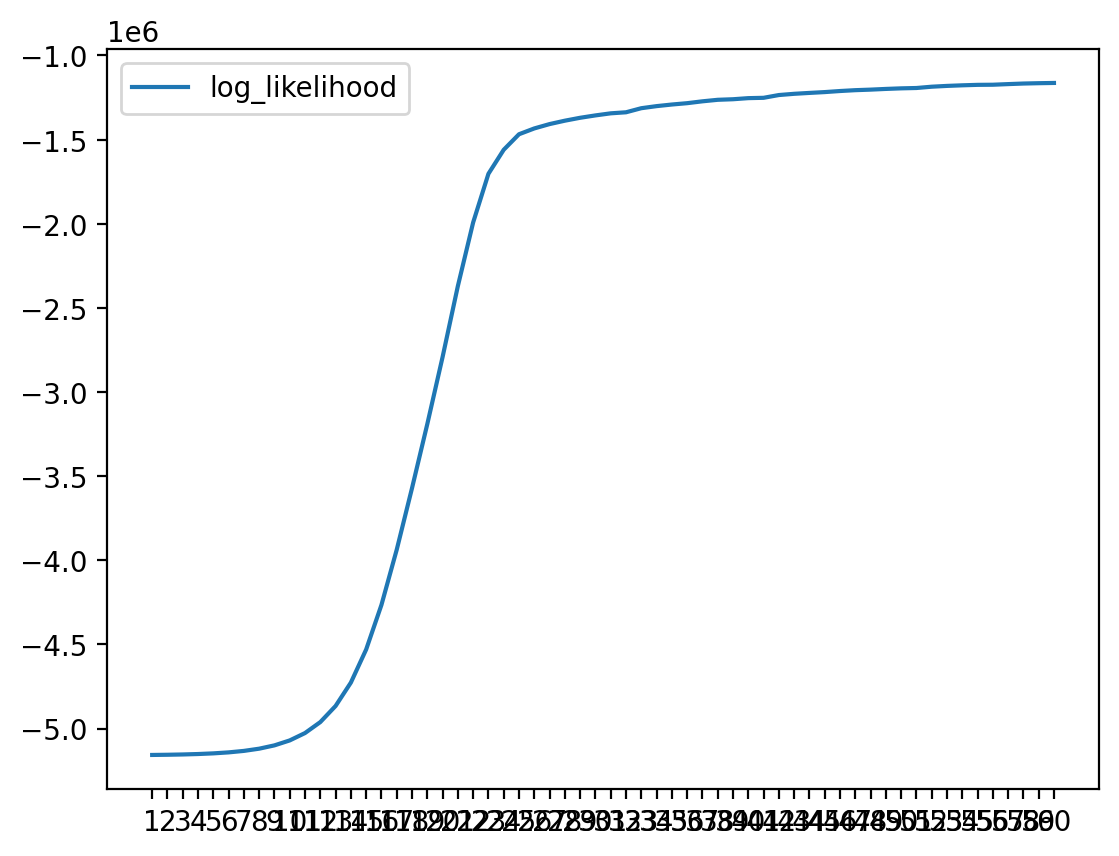

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# print available saved status keys
print(iteration_status_dictionaries[-1].keys())
# print(iteration_status_dictionaries[-1]['gradient'].keys())

y = [it_data['current_log_likelihood'] for it_data in iteration_status_dictionaries]
#print(len(y))
x = np.arange(1, estimator_options['max_iterations']+1)
x = np.arange(1, len(y)+1)

fig = plt.figure()

# plot log-likelihood
plt.plot(x, [it_data['current_log_likelihood'] for it_data in iteration_status_dictionaries], label='log_likelihood')
# plt.plot(x, [it_data['current_attachment'] for it_data in iteration_status_dictionaries], label='attachment')
# plt.plot(x, [it_data['current_regularity'] for it_data in iteration_status_dictionaries], label='regularity')

plt.xticks(x)

plt.style.use('default')
plt.legend()
plt.show()

/tmp/ipykernel_273060/1102077210.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


IndexError: index 5 is out of bounds for axis 1 with size 5

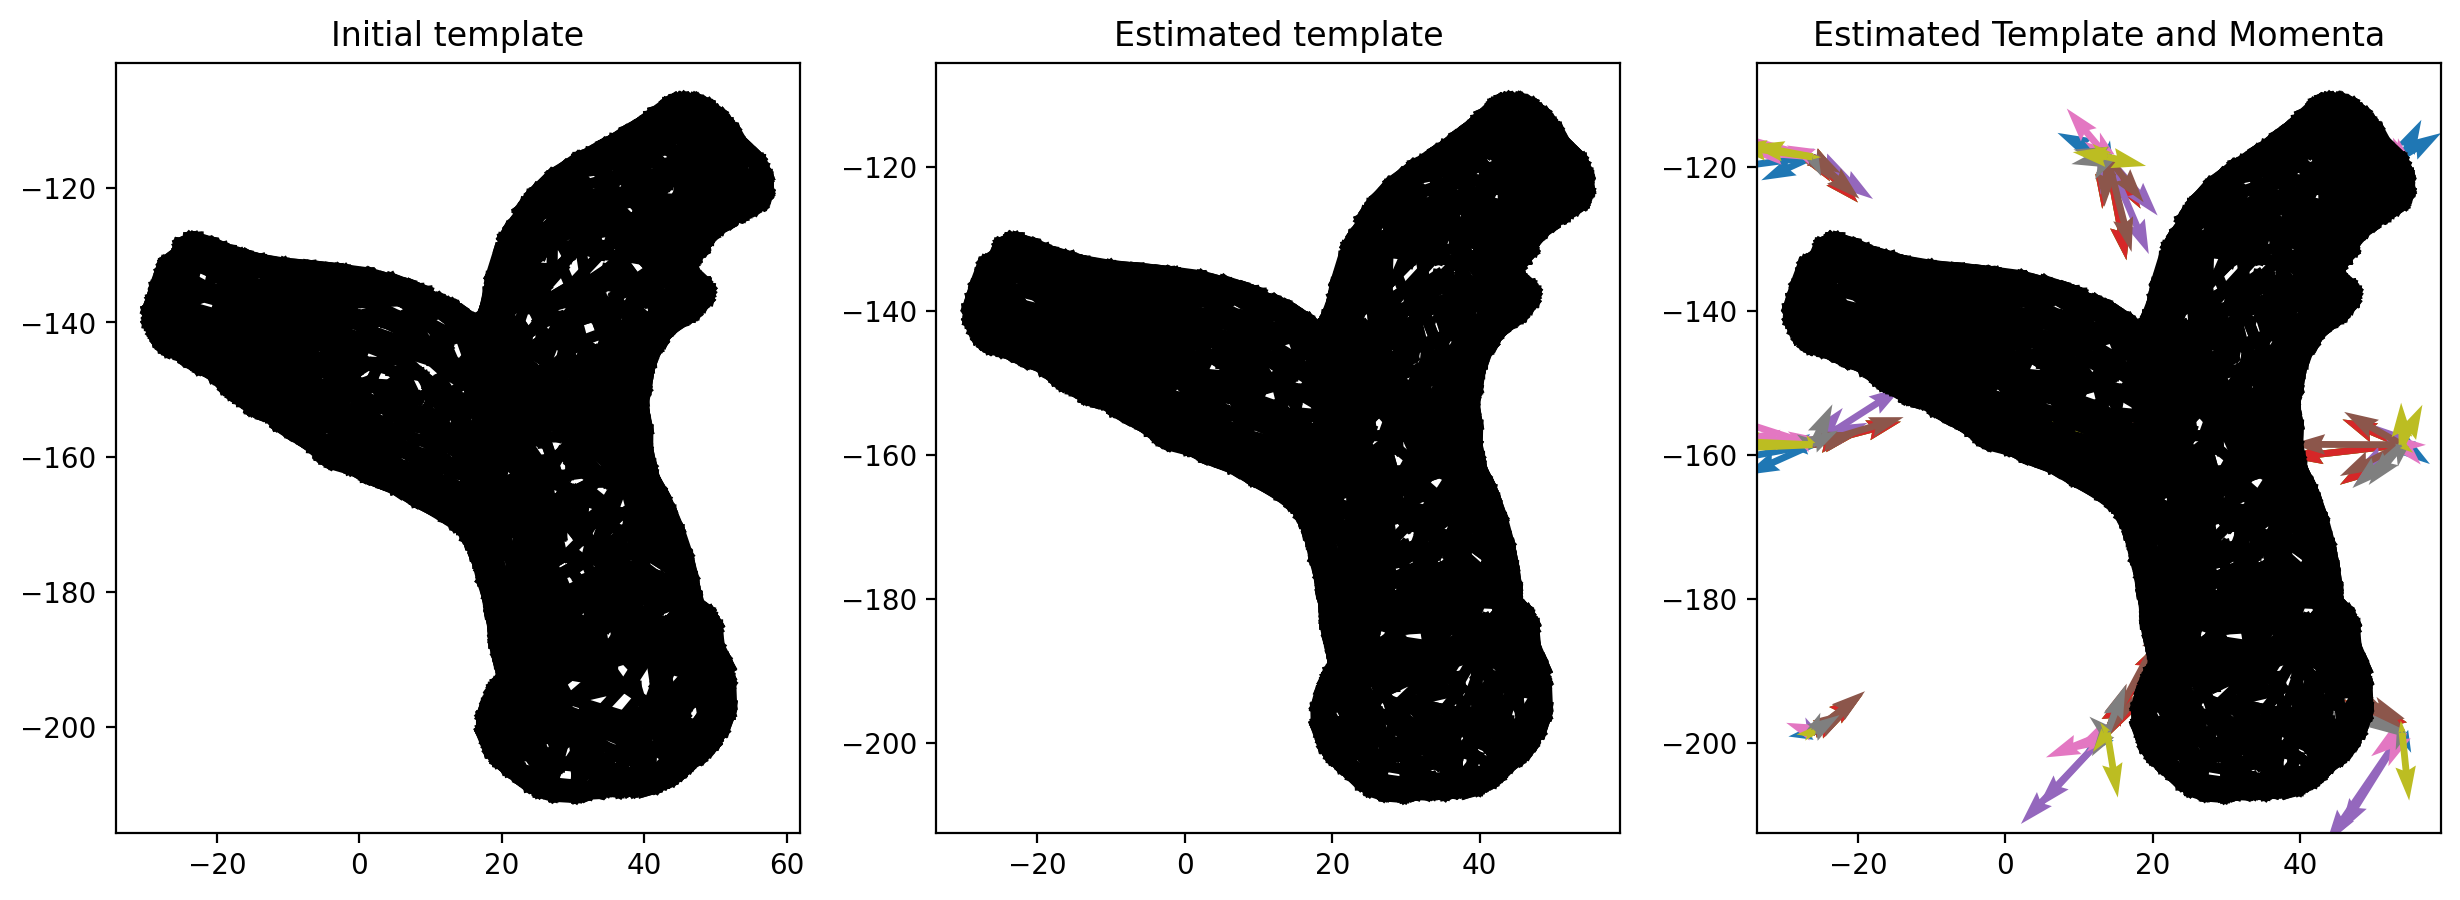

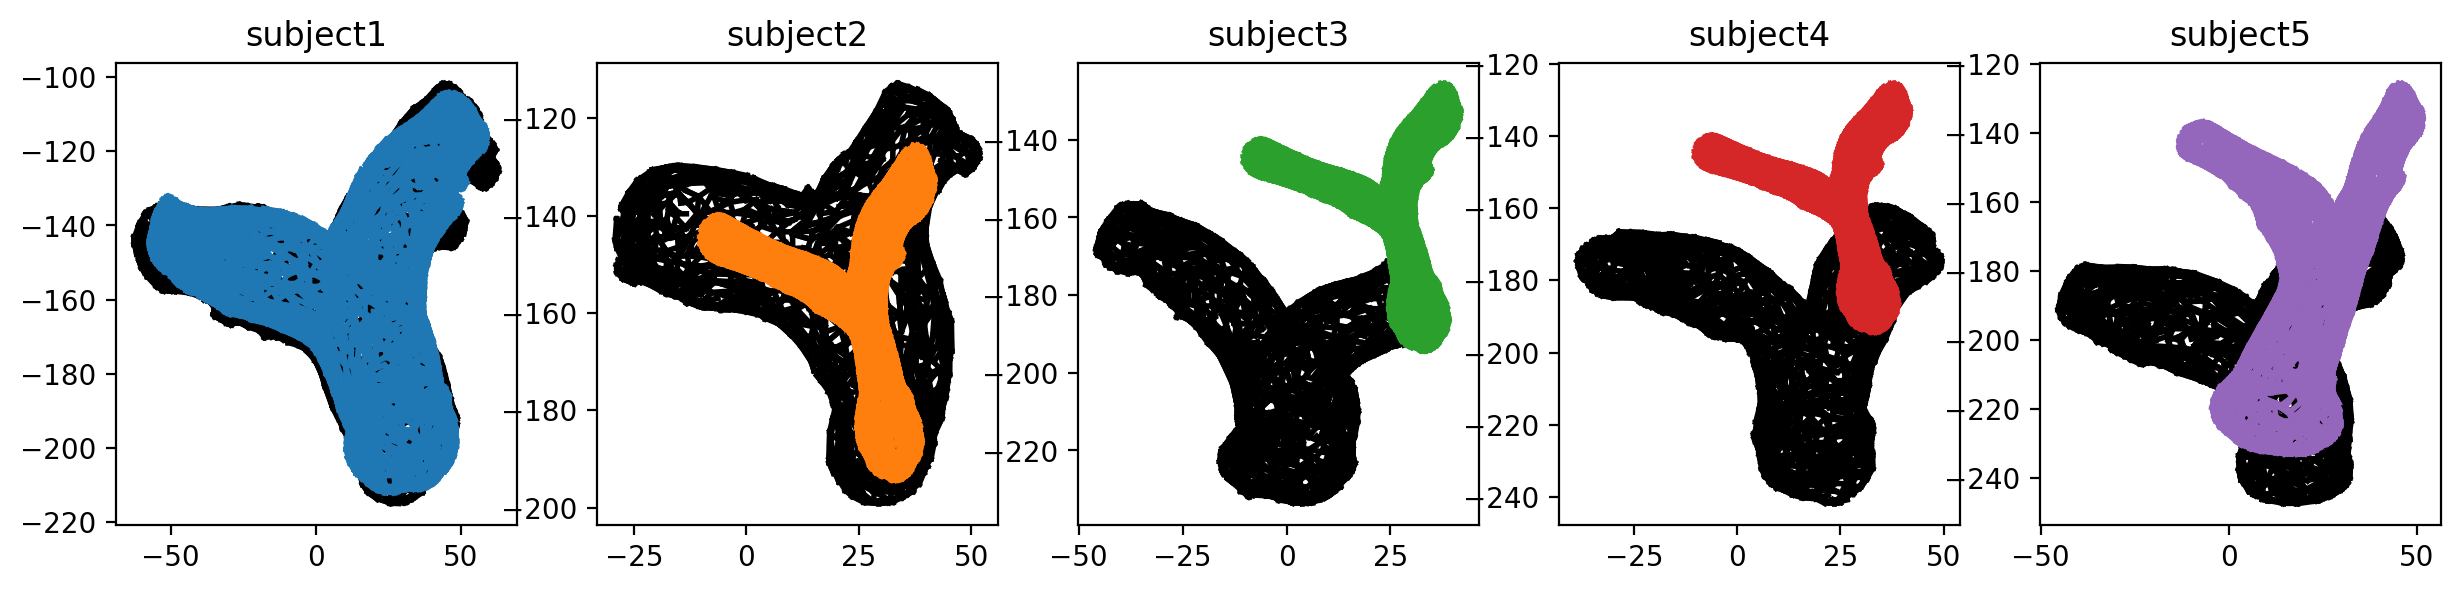

In [9]:
####
#### LOAD RELEVANT INPUT DATA
####

import deformetrica as dfca

path_to_template_ini = template_specifications['pulmonary artery']['filename']
template_points__ini, dimension, template_connectivity__ini = dfca.io.DeformableObjectReader.read_file(path_to_template_ini, extract_connectivity=True)

####
#### LOAD RELEVANT OUTPUT DATA
####

fixed_effects = model.fixed_effects

template_points__est = fixed_effects['template_data']['landmark_points']
control_points__est = fixed_effects['control_points']
momenta__est = fixed_effects['momenta']

####
#### PLOT INITIAL AND ESTIMATED TEMPLATES
####

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

figsize = 5
f = plt.figure(figsize=(3*figsize, 1*figsize))
gs = gridspec.GridSpec(1, 3)

# Initial template
ax = plt.subplot(gs[0, 0])
p = template_points__ini
c = template_connectivity__ini
ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], 
        [p[c[:,0]][:,1], p[c[:,1]][:,1]], 'k', linewidth=4)
ax.set_title('Initial template')

# Estimated template
ax = plt.subplot(gs[0, 1])
p = template_points__est
ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], 'k', linewidth=4)
ax.set_title('Estimated template')

# Estimated template and momenta
ax = plt.subplot(gs[0, 2])
x = control_points__est
ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], 'k', linewidth=4)
cmap = cm.get_cmap('tab10')
for i, m in enumerate(momenta__est):
    color = cmap(i % 10)[:3]
    ax.quiver(x[:,0], x[:,1], m[:,0], m[:,1], color=color, width=0.01, scale=75)
ax.set_title('Estimated Template and Momenta')

####
#### PLOT RAW VERSUS RECONSTRUCTED DATA
####

import torch 

figsize = 3
f = plt.figure(figsize=(5*figsize, 1*figsize))
gs = gridspec.GridSpec(1, 5)

for i, momentum__est in enumerate(momenta__est): 
    ax = plt.subplot(gs[0, i])
    color = cmap(i % 10)[:3]
  
    # Load and plot raw target. 
    path_to_target__raw = dataset_specifications['dataset_filenames'][i][0]['pulmonary artery']
    target_id = dataset_specifications['subject_ids'][i]
    target_points__raw, _, target_connectivity__raw = dfca.io.DeformableObjectReader.read_file(path_to_target__raw, extract_connectivity=True)

    p = target_points__raw
    c = target_connectivity__raw
    ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], 'k', linewidth=2)
    ax.set_title(target_id)
  
    # Compute and plot the reconstruction of the target. 
    model.exponential.set_initial_momenta(torch.from_numpy(momentum__est).to(torch.float32))
    model.exponential.update()
    target_points__rec = model.exponential.get_template_points()['landmark_points'].detach().cpu().numpy()
  
    p = target_points__rec
    c = template_connectivity__ini
    ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], color=color, linewidth=2)

plt.style.use('default')
plt.show()




In [ ]:
### CHOOSE WHICH ORGAN TO PLOT
organ = 'hippo'
organ = 'amygdala'

path_to_template__ini = template_specifications[organ]['filename']
template_points__ini, dimension, template_connectivity__ini = dfca.io.DeformableObjectReader.read_file(path_to_template__ini, extract_connectivity=True)

####
#### LOAD RELEVANT OUTPUT DATA
####

fixed_effects = model.fixed_effects

template_points__est = fixed_effects['template_data']['landmark_points']
control_points__est = fixed_effects['control_points']
momenta__est = fixed_effects['momenta']

####
#### PLOT INITIAL AND ESTIMATED TEMPLATES
####

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

figsize = 5
f = plt.figure(figsize=(3*figsize, 1*figsize))
gs = gridspec.GridSpec(1, 3)

# Initial template
ax = plt.subplot(gs[0, 0], projection='3d')
p = template_points__ini
c = template_connectivity__ini
for i in range(0, len(p[c[:,0]][:,0])):
    ax.plot3D(
        [p[c[:,0]][:,0][i], p[c[:,1]][:,0][i]],
        [p[c[:,0]][:,1][i], p[c[:,1]][:,1][i]],
        [p[c[:,0]][:,2][i], p[c[:,1]][:,2][i]],
        color='k', linewidth=1)
ax.set_title('Initial template')
ax.view_init(120, -90)

# Estimated template
ax = plt.subplot(gs[0, 1], projection='3d')
p = template_points__est
for i in range(0, len(p[c[:,0]][:,0])):
    ax.plot3D(
        [p[c[:,0]][:,0][i], p[c[:,1]][:,0][i]],
        [p[c[:,0]][:,1][i], p[c[:,1]][:,1][i]],
        [p[c[:,0]][:,2][i], p[c[:,1]][:,2][i]],
        color='k', linewidth=1)
ax.set_title('Estimated template')
ax.view_init(120, -90)

# Estimated template and momenta
ax = plt.subplot(gs[0, 2], projection='3d')
x = control_points__est
for i in range(0, len(p[c[:,0]][:,0])):
    ax.plot3D(
        [p[c[:,0]][:,0][i], p[c[:,1]][:,0][i]],
        [p[c[:,0]][:,1][i], p[c[:,1]][:,1][i]],
        [p[c[:,0]][:,2][i], p[c[:,1]][:,2][i]],
        color='k', linewidth=1) 
    
cmap = cm.get_cmap('tab10')
for i, m in enumerate(momenta__est):
    color = cmap(i % 10)[:3]
    ax.quiver3D(x[:,0], x[:,1], x[:,2], 
                m[:,0], m[:,1], m[:,2], 
                #m[0], m[1], m[2], 
                color=color, 
                length=20,
#                 width=0.01, 
#                 scale=75
               )
ax.set_title('Estimated template and momenta')
ax.view_init(120, -90)

plt.style.use('default')
plt.show()

####
#### PLOT RAW VERSUS RECONSTRUCTED DATA
####

import torch 

figsize = 3
f = plt.figure(figsize=(5*figsize, 1*figsize))
gs = gridspec.GridSpec(1, 5)

for i, momentum__est in enumerate(momenta__est): 
    ax = plt.subplot(gs[0, i], projection='3d')
    color = cmap(i % 10)[:3]
  
    # Load and plot raw target. 
    path_to_target__raw = dataset_specifications['dataset_filenames'][i][0][organ]
    print(path_to_target__raw)
    target_id = dataset_specifications['subject_ids'][i]
    target_points__raw, _, target_connectivity__raw = dfca.io.DeformableObjectReader.read_file(path_to_target__raw, extract_connectivity=True)

    p = target_points__raw
    c = target_connectivity__raw
    for i in range(0, len(p[c[:,0]][:,0])):
        ax.plot3D(
            [p[c[:,0]][:,0][i], p[c[:,1]][:,0][i]],
            [p[c[:,0]][:,1][i], p[c[:,1]][:,1][i]],
            [p[c[:,0]][:,2][i], p[c[:,1]][:,2][i]],
            color='k', linewidth=1)
    #ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], 'k', linewidth=2)
    ax.set_title(target_id)
  
    # Compute and plot the reconstruction of the target. 
    model.exponential.set_initial_momenta(torch.from_numpy(momentum__est).to(torch.float32))
    model.exponential.update()
    target_points__rec = model.exponential.get_template_points()['landmark_points'].detach().cpu().numpy()
  
    p = target_points__rec
    c = template_connectivity__ini
    #ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], color=color, linewidth=2)
    for i in range(0, len(p[c[:,0]][:,0])):
        ax.plot3D(
            [p[c[:,0]][:,0][i], p[c[:,1]][:,0][i]],
            [p[c[:,0]][:,1][i], p[c[:,1]][:,1][i]],
            [p[c[:,0]][:,2][i], p[c[:,1]][:,2][i]],
            color=color, linewidth=1)

plt.style.use('default')
plt.show()

In [ ]:
import os
import deformetrica as dfca

#organ = 'hippo'
organ = 'amygdala'

### EDIT THESE PATHS #####################
data_path = '/u/i/sm2894/Documents/FYP/'
data_base = os.path.join(data_path, 'Data/clinical sm/')

output_directory = './brain_' + organ + '_output/' #directory where the outputs will be saved
########################################

iteration_status_dictionaries = []

def estimator_callback(status_dict):
    iteration_status_dictionaries.append(status_dict)
    return True

# instantiate a Deformetrica object
deformetrica = dfca.Deformetrica(output_dir=output_directory, verbosity='INFO')

dataset_specifications = {
    'dataset_filenames': [
        [{organ: os.path.join(data_base, organ + '1.vtk')}],
        [{organ: os.path.join(data_base, organ + '2.vtk')}],
        [{organ: os.path.join(data_base, organ + '3.vtk')}],
        [{organ: os.path.join(data_base, organ + '4.vtk')}]
    ],
    'subject_ids': ['subject1', 'subject2', 'subject3', 'subject4'],
}
if organ == "hippo":
    template_name = 'hippo_prototype.vtk'
elif organ == "amygdala":
    template_name = 'amyg_prototype.vtk'
    
template_specifications = {
    organ: {'deformable_object_type': 'SurfaceMesh',
              'kernel_type': 'torch', 'kernel_width': 25.0, #Vary this
              'noise_std': 10.0, #Vary this
              'filename': os.path.join(data_base, template_name),
              'attachment_type': 'Current',
              #'kernel_device' : 'cpu'
                },   
}

#estimator_options={'optimization_method_type': 'GradientAscent', 'initial_step_size': 1.,
#                   'max_iterations': 100, 'max_line_search_iterations': 20, 'callback': estimator_callback}

estimator_options={'optimization_method_type': 'GradientAscent', 
                   'initial_step_size': 0.01, #
                   'max_iterations': 500, #
                   'max_line_search_iterations': 10, 
                   'convergence_tolerance': 1e-4, #
                   'freeze_template': 'Off',
                   'number_of_processes': 4,
                   'callback': estimator_callback}

# deformation-parameters 
model_options={'deformation_kernel_type': 'torch', 
               'deformation_kernel_width': 25.0, #Vary this
               'dtype': 'float32'}


model = deformetrica.estimate_deterministic_atlas(template_specifications, dataset_specifications,
                                                estimator_options=estimator_options,
                                                model_options=model_options)

In [ ]:
### CHOOSE WHICH ORGAN TO PLOT


path_to_template__ini = template_specifications[organ]['filename']
template_points__ini, dimension, template_connectivity__ini = dfca.io.DeformableObjectReader.read_file(path_to_template__ini, extract_connectivity=True)

####
#### LOAD RELEVANT OUTPUT DATA
####

fixed_effects = model.fixed_effects

template_points__est = fixed_effects['template_data']['landmark_points']
control_points__est = fixed_effects['control_points']
momenta__est = fixed_effects['momenta']

####
#### PLOT INITIAL AND ESTIMATED TEMPLATES
####

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

figsize = 5
f = plt.figure(figsize=(3*figsize, 1*figsize))
gs = gridspec.GridSpec(1, 3)

# Initial template
ax = plt.subplot(gs[0, 0], projection='3d')
p = template_points__ini
c = template_connectivity__ini
for i in range(0, len(p[c[:,0]][:,0])):
    ax.plot3D(
        [p[c[:,0]][:,0][i], p[c[:,1]][:,0][i]],
        [p[c[:,0]][:,1][i], p[c[:,1]][:,1][i]],
        [p[c[:,0]][:,2][i], p[c[:,1]][:,2][i]],
        color='k', linewidth=1)
ax.set_title('Initial template')
ax.view_init(120, -90)

# Estimated template
ax = plt.subplot(gs[0, 1], projection='3d')
p = template_points__est
for i in range(0, len(p[c[:,0]][:,0])):
    ax.plot3D(
        [p[c[:,0]][:,0][i], p[c[:,1]][:,0][i]],
        [p[c[:,0]][:,1][i], p[c[:,1]][:,1][i]],
        [p[c[:,0]][:,2][i], p[c[:,1]][:,2][i]],
        color='k', linewidth=1)
ax.set_title('Estimated template')
ax.view_init(120, -90)

# Estimated template and momenta
ax = plt.subplot(gs[0, 2], projection='3d')
x = control_points__est
for i in range(0, len(p[c[:,0]][:,0])):
    ax.plot3D(
        [p[c[:,0]][:,0][i], p[c[:,1]][:,0][i]],
        [p[c[:,0]][:,1][i], p[c[:,1]][:,1][i]],
        [p[c[:,0]][:,2][i], p[c[:,1]][:,2][i]],
        color='k', linewidth=1) 
    
cmap = cm.get_cmap('tab10')
for i, m in enumerate(momenta__est):
    color = cmap(i % 10)[:3]
    ax.quiver3D(x[:,0], x[:,1], x[:,2], 
                m[:,0], m[:,1], m[:,2], 
                #m[0], m[1], m[2], 
                color=color, 
                length=20,
#                 width=0.01, 
#                 scale=75
               )
ax.set_title('Estimated template and momenta')
ax.view_init(120, -90)

plt.style.use('default')
plt.show()

####
#### PLOT RAW VERSUS RECONSTRUCTED DATA
####

import torch 

figsize = 3
f = plt.figure(figsize=(5*figsize, 1*figsize))
gs = gridspec.GridSpec(1, 5)

for i, momentum__est in enumerate(momenta__est): 
    ax = plt.subplot(gs[0, i], projection='3d')
    color = cmap(i % 10)[:3]
  
    # Load and plot raw target. 
    path_to_target__raw = dataset_specifications['dataset_filenames'][i][0][organ]
    print(path_to_target__raw)
    target_id = dataset_specifications['subject_ids'][i]
    target_points__raw, _, target_connectivity__raw = dfca.io.DeformableObjectReader.read_file(path_to_target__raw, extract_connectivity=True)

    p = target_points__raw
    c = target_connectivity__raw
    for i in range(0, len(p[c[:,0]][:,0])):
        ax.plot3D(
            [p[c[:,0]][:,0][i], p[c[:,1]][:,0][i]],
            [p[c[:,0]][:,1][i], p[c[:,1]][:,1][i]],
            [p[c[:,0]][:,2][i], p[c[:,1]][:,2][i]],
            color='k', linewidth=1)
    #ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], 'k', linewidth=2)
    ax.set_title(target_id)
  
    # Compute and plot the reconstruction of the target. 
    model.exponential.set_initial_momenta(torch.from_numpy(momentum__est).to(torch.float32))
    model.exponential.update()
    target_points__rec = model.exponential.get_template_points()['landmark_points'].detach().cpu().numpy()
  
    p = target_points__rec
    c = template_connectivity__ini
    #ax.plot([p[c[:,0]][:,0], p[c[:,1]][:,0]], [p[c[:,0]][:,1], p[c[:,1]][:,1]], color=color, linewidth=2)
    for i in range(0, len(p[c[:,0]][:,0])):
        ax.plot3D(
            [p[c[:,0]][:,0][i], p[c[:,1]][:,0][i]],
            [p[c[:,0]][:,1][i], p[c[:,1]][:,1][i]],
            [p[c[:,0]][:,2][i], p[c[:,1]][:,2][i]],
            color=color, linewidth=1)

plt.style.use('default')
plt.show()